In [1]:
import os

import numpy as np

from keras import layers, models

import tensorflow as tf
from tensorflow.keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from pathlib import Path
import pandas as pd
from skimage.io import imread

In [16]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration()])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

ValueError: Setting memory limit is required for GPU virtual devices

In [4]:
data_dir = Path('D:\Git\Research Paper\DataSet - Mehedi Hasan, Medical Technologist, Bangladesh Hospitals\Project')
train_dir = data_dir / 'Train'
test_dir = data_dir / 'Test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,  
                                   rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2)

In [6]:
train_set= train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    subset='training')
#validation data
validation_set = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size=64,
                                                        class_mode='categorical',
                                                        subset='validation')

Found 6506 images belonging to 2 classes.
Found 1626 images belonging to 2 classes.


In [7]:
dataiter = iter(train_set)
images, labels = dataiter.next()
images.shape

(64, 224, 224, 3)

In [7]:
import tensorflow as tf
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
   rotation_range=30, horizontal_flip=True)

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [9]:


model.add(layers.Flatten())
model.add(layers.Dense(264, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',  #loss for binary classification
              optimizer=optimizers.SGD(learning_rate = 0.01), #RMS optimizer
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8568155711888617296
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2916378215
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2476015175646452925
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [11]:
callback = EarlyStopping('loss', patience=3)

In [ ]:
history = model.fit(train_set,
                    epochs=45,
                    batch_size=64,
                    validation_data=validation_set)

Epoch 1/45
102/102 [==============================] - 152s 1s/step - loss: 0.5838 - accuracy: 0.7359 - val_loss: 0.5766 - val_accuracy: 0.7417
Epoch 2/45
102/102 [==============================] - 141s 1s/step - loss: 0.5655 - accuracy: 0.7413 - val_loss: 0.5675 - val_accuracy: 0.7417
Epoch 3/45
102/102 [==============================] - 142s 1s/step - loss: 0.5454 - accuracy: 0.7415 - val_loss: 0.5579 - val_accuracy: 0.7417
Epoch 4/45
102/102 [==============================] - 155s 2s/step - loss: 0.5314 - accuracy: 0.7410 - val_loss: 0.5788 - val_accuracy: 0.7417
Epoch 5/45
102/102 [==============================] - 156s 2s/step - loss: 0.5032 - accuracy: 0.7419 - val_loss: 0.6686 - val_accuracy: 0.4748
Epoch 6/45
102/102 [==============================] - 150s 1s/step - loss: 0.4959 - accuracy: 0.7467 - val_loss: 0.5782 - val_accuracy: 0.7073
Epoch 7/45
102/102 [==============================] - 142s 1s/step - loss: 0.4802 - accuracy: 0.7602 - val_loss: 0.6026 - val_accuracy: 0.7269

: 

: 

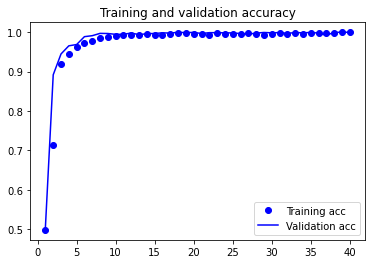

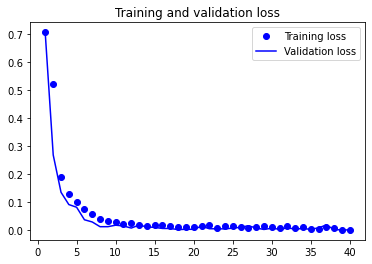

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [40]:
y_pred= model.predict(np.array(y_test))
#testing labels
y_true= y_test.classes
#finding confusion matrix for test data
cnf_matrix= confusion_matrix(y_true,y_pred.argmax(axis=1))
print('Confusion Matrix:\n',cnf_matrix)

ValueError: in user code:

    File "d:\Anaconda\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "d:\Anaconda\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Anaconda\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "d:\Anaconda\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "d:\Anaconda\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\Anaconda\envs\tensorflow\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=False
      • mask=None


In [42]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(data_dir,
                                                  target_size=(224, 224),
                                                  batch_size=100,
                                                  shuffle=False,
                                                  class_mode='categorical')

Found 8244 images belonging to 3 classes.
